# The Poisson route EV problem

## Static case

* Travels start at Poisson points $X_n$ in the line with intensity $\nu$.
* Travel autonomy is random $L_n$ with density $f(l)dl$.
* Chargers are set at a distance $d$ apart.

In [51]:
using Distributions

function simulate_poisson_route(nu,travel_dist::Distribution,d;xlims=(-20,20))
    
    largo = xlims[2]-xlims[1];
    N = rand(Poisson(nu*largo))
    
    X = rand(Uniform(xlims[1],xlims[2]),N)
    L = d.+rand(travel_dist,N)
    
    charger_positions = collect(xlims[1]:d:xlims[2])
    n = length(charger_positions)
    
    Nc=zeros(n)
    
    for i=1:n
        Nc[i] = length(findall( (X.<charger_positions[i]).*(X+L.>charger_positions[i]).*(X+L.<charger_positions[i]+d)))
    end
    
    return X,L,charger_positions,Nc
end

simulate_poisson_route (generic function with 1 method)

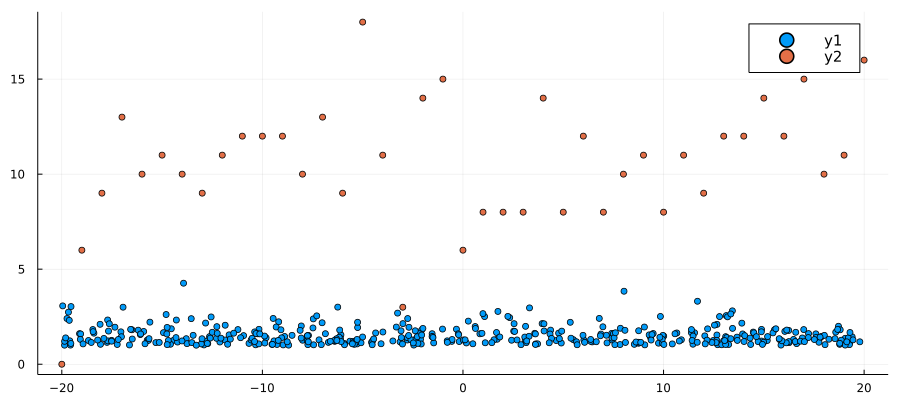

In [57]:
using Plots, LaTeXStrings
default(size=(900,400), legendfontsize=10)

nu = 10.0
mu = 2.0
travel_dist = Exponential(1/mu)
d = 1.0

X,L,charger_positions,Nc = simulate_poisson_route(nu,travel_dist,d)

scatter(X,L)
scatter!(charger_positions,Nc)

In [58]:
reps=10000

Nc = zeros(reps)

for i=1:reps
    X,L,charger_positions,nc = simulate_poisson_route(nu,travel_dist,d)
    idx = findfirst(charger_positions.==0)
    Nc[i] = nc[idx];
end


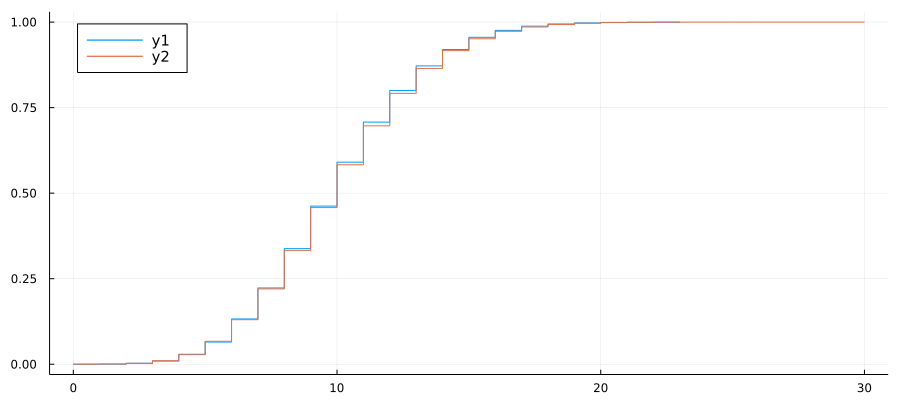

In [59]:
using StatsBase
plot(ecdf(Nc))

predicted_mean = nu
plot!((0:3*predicted_mean),cdf(Poisson(predicted_mean),(0:3*predicted_mean)),lt=:steppost)

In [55]:
predicted_mean, mean(Nc)

(10.0, 9.9775)